In [1]:
import glob, os, sys
sys.path.append("..")
from utils.utils import *
import uproot, ROOT, random, time, vector
import matplotlib.pyplot as plt
import numpy as np
import awkward as ak
import json
from sklearn.metrics import roc_curve, roc_auc_score, auc
from tqdm import tqdm
import pandas as pd
from xgboost import XGBClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# Set up plot defaults
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = 12.0,8.0  # Roughly 11 cm wde by 8 cm high
mpl.rcParams['font.size'] = 14.0 # Use 14 point font
sns.set(style="whitegrid")

Welcome to JupyROOT 6.28/04


In [9]:
# path = '/global/homes/a/agarabag/pscratch/ditdau_samples/nom/'
# vbfh_path = [path+'user.shhirose.Httbst_b4.mc20_13TeV.346190.PoPy8_NNPDF30_VBFH125_ttl13l7.PHYS.e7259_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
# path+'user.shhirose.Httbst_b4.mc20_13TeV.346191.PoPy8_NNPDF30_VBFH125_ttlm15hp20.PHYS.e7259_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
# path+'user.shhirose.Httbst_b4.mc20_13TeV.346192.PoPy8_NNPDF30_VBFH125_ttlp15hm20.PHYS.e7259_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
# path+'user.shhirose.Httbst_b4.mc20_13TeV.346193.PoPy8_NNPDF30_VBFH125_tth30h20.PHYS.e7259_s3681_r13145_p5855.smPre_w_0_HS/user.*.root']
# vbfh_dsid = [346190, 346191, 346192, 346193]
             
# ggh_path = [path+'user.shhirose.Httbst_b4.mc20_13TeV.345120.PoPy8_NNLO_30_ggH125_ttl13l7.PHYS.e5814_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
# path+'user.shhirose.Httbst_b4.mc20_13TeV.345121.PoPy8_NNLO_30_ggH125_ttlm15hp20.PHYS.e5814_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
# path+'user.shhirose.Httbst_b4.mc20_13TeV.345122.PoPy8_NNLO_30_ggH125_ttlp15hm20.PHYS.e5814_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
# path+'user.shhirose.Httbst_b4.mc20_13TeV.345123.PoPy8_NNLO_30_ggH125_tth30h20.PHYS.e5814_s3681_r13145_p5855.smPre_w_0_HS/user.*.root']
# ggh_dsid = [345120, 345121, 345122, 345123]

# vh_path = [path+'user.shhirose.Httbst_b4.mc20_13TeV.345211.PoPy8_NNPDF30__WmH125J_Winc_MINLO_tt.PHYS.e5808_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
# path+'user.shhirose.Httbst_b4.mc20_13TeV.345212.PoPy8_NNPDF30__WpH125J_Winc_MINLO_tt.PHYS.e5808_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
# path+'user.shhirose.Httbst_b4.mc20_13TeV.345217.PoPy8_NNPDF30__ZH125J_Zinc_MINLO_tt.PHYS.e5808_s3681_r13145_p5855.smPre_w_0_HS/user.*.root']
# vh_dsid = [345211, 345212, 345217]

# vv_path = [path+'user.shhirose.Httbst_b4.mc20_13TeV.700488.Sh_2211_WlvWqq.PHYS.e8338_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
# path+'user.shhirose.Httbst_b4.mc20_13TeV.700489.Sh_2211_WlvZqq.PHYS.e8338_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
# path+'user.shhirose.Httbst_b4.mc20_13TeV.700491.Sh_2211_WqqZvv.PHYS.e8338_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
# path+'user.shhirose.Httbst_b4.mc20_13TeV.700492.Sh_2211_WqqZll.PHYS.e8338_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
# path+'user.shhirose.Httbst_b4.mc20_13TeV.700493.Sh_2211_ZqqZll.PHYS.e8338_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
# path+'user.shhirose.Httbst_b4.mc20_13TeV.700495.Sh_2211_ZqqZvv.PHYS.e8338_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
# path+'user.shhirose.Httbst_b4.mc20_13TeV.700600.Sh_2212_llll.PHYS.e8433_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
# path+'user.shhirose.Httbst_b4.mc20_13TeV.700601.Sh_2212_lllv.PHYS.e8433_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
# path+'user.shhirose.Httbst_b4.mc20_13TeV.700602.Sh_2212_llvv_os.PHYS.e8433_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
# path+'user.shhirose.Httbst_b4.mc20_13TeV.700603.Sh_2212_llvv_ss.PHYS.e8433_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
# path+'user.shhirose.Httbst_b4.mc20_13TeV.700604.Sh_2212_lvvv.PHYS.e8433_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
# path+'user.shhirose.Httbst_b4.mc20_13TeV.700605.Sh_2212_vvvv.PHYS.e8433_s3681_r13145_p5855.smPre_w_0_HS/user.*.root']
# vv_dsid = [700488, 700489, 700491, 700492, 700493, 700495, 700600, 700601, 700602, 700603, 700604, 700605]

# ztt_path = [path+'user.shhirose.Httbst_b4.mc20_13TeV.700792.Sh_2214_Ztt_maxHTpT_BF.PHYS.e8527_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
# path+'user.shhirose.Httbst_b4.mc20_13TeV.700793.Sh_2214_Ztt_maxHTpT_CFBV.PHYS.e8527_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
# path+'user.shhirose.Httbst_b4.mc20_13TeV.700794.Sh_2214_Ztt_maxHTpT_CVBV.PHYS.e8527_s3681_r13145_p5855.smPre_w_0_HS/user.*.root']
# ztt_dsid = [700792, 700793, 700794]

In [4]:
##### signal ######
vbfh_dsid = [346190, 346191, 346192, 346193]      
ggh_dsid = [345120, 345121, 345122, 345123]
WH = [345211, 345212]
ZH = [345217]
ttH = [346343,346344,346345]


##### background ######
vh_dsid = [345211, 345212, 345217]
vv_dsid = [700488, 700489, 700491, 700492, 700493, 700495, 700600, 700601, 700602, 700603, 700604, 700605]
ztt_dsid = [700792, 700793, 700794]
ttV = [
    410155, # ttW
    410218, 410219, 410220, # ttZ
    # 412043, 304014 # 4t,3t #! missing these samples
    ]
Top = [
    410470, 410471, 410472, 
    410644, 410645, 410646, 410647, 
    410658, 410659
]
W = [
    700338, 700339, 700340, # Wenu
    700341, 700342, 700343, # Wmunu
    700344, 700345, 700346, # WtaunuL
    700347, 700348, 700349, # WtaunuH #! should these be included? 
    700362, 700363, 700364, # W lep + 2jets
]
Zll_inc = [
    700320, 700321, 700322, # Zee 
    700323, 700324, 700325, # Zmumu
] 

In [16]:

path_template = '/global/homes/a/agarabag/pscratch/ditdau_samples/nom_new/user.shhirose.*{dsid}.*/'
total_dsid = vbfh_dsid + ggh_dsid + WH + ZH + ttH + vh_dsid + vv_dsid + ztt_dsid + ttV + Top + W + Zll_inc

def check_directories_with_ids(path_template, dsid_arrays):
    missing_dirs = []
    total_num_dirs = 0

    for dsid in dsid_arrays:
        path = path_template.format(dsid=dsid)
        total_num_dirs += len(glob.glob(path))
        if not any(os.path.isdir(d) for d in glob.glob(path)):
            missing_dirs.append(path)
        

    return missing_dirs, total_num_dirs

missing_dirs, total_num_dirs = check_directories_with_ids(path_template, total_dsid)
print(f"Total number of directories: {total_num_dirs}")
if missing_dirs:
    print("Directories missing for the following IDs:")
    for dir in missing_dirs:
        print(dir)
else:
    print("All directories associated with the IDs are present.")

Total number of directories: 66
All directories associated with the IDs are present.


In [8]:
#count the total number of id in all list above 
total_dsid = vbfh_dsid + ggh_dsid + WH + ZH + ttH + vh_dsid + vv_dsid + ztt_dsid + ttV + Top + W + Zll_inc
print(total_dsid)
print(len(total_dsid))


[346190, 346191, 346192, 346193, 345120, 345121, 345122, 345123, 345211, 345212, 345217, 346343, 346344, 346345, 345211, 345212, 345217, 700488, 700489, 700491, 700492, 700493, 700495, 700600, 700601, 700602, 700603, 700604, 700605, 700792, 700793, 700794, 410155, 410218, 410219, 410220, 410470, 410471, 410472, 410644, 410645, 410646, 410647, 410658, 410659, 700338, 700339, 700340, 700341, 700342, 700343, 700344, 700345, 700346, 700347, 700348, 700349, 700362, 700363, 700364, 700320, 700321, 700322, 700323, 700324, 700325]
66


In [2]:
# path = '/global/homes/a/agarabag/pscratch/ditdau_samples/nom_new/'

# vbfh_path = [
# path+'user.shhirose.Httbst_b5.mc20_13TeV.346190.PoPy8_NNPDF30_VBFH125_ttl13l7.PHYS.r13145_p5855.smPre_w_0_HS/user.*.root',
# path+'user.shhirose.Httbst_b5.mc20_13TeV.346191.PoPy8_NNPDF30_VBFH125_ttlm15hp20.PHYS.r13145_p5855.smPre_w_0_HS/user.*.root',
# path+'user.shhirose.Httbst_b5.mc20_13TeV.346192.PoPy8_NNPDF30_VBFH125_ttlp15hm20.PHYS.r13145_p5855.smPre_w_0_HS/user.*.root',
# path+'user.shhirose.Httbst_b5.mc20_13TeV.346193.PoPy8_NNPDF30_VBFH125_tth30h20.PHYS.r13145_p5855.smPre_w_0_HS/user.*.root']    
# vbfh_dsid = [346190, 346191, 346192, 346193]
             
# ggh_path = [
# path+'user.shhirose.Httbst_b5.mc20_13TeV.345120.PoPy8_NNLO_30_ggH125_ttl13l7.PHYS.r13145_p5855.smPre_w_0_HS/user.*.root',
# path+'user.shhirose.Httbst_b5.mc20_13TeV.345121.PoPy8_NNLO_30_ggH125_ttlm15hp20.PHYS.r13145_p5855.smPre_w_0_HS/user.*.root',
# path+'user.shhirose.Httbst_b5.mc20_13TeV.345122.PoPy8_NNLO_30_ggH125_ttlp15hm20.PHYS.r13145_p5855.smPre_w_0_HS/user.*.root',
# path+'user.shhirose.Httbst_b5.mc20_13TeV.345123.PoPy8_NNLO_30_ggH125_tth30h20.PHYS.r13145_p5855.smPre_w_0_HS/user.*.root']
# ggh_dsid = [345120, 345121, 345122, 345123]

# vh_path = [
# path+'user.shhirose.Httbst_b5.mc20_13TeV.345211.PoPy8_NNPDF30__WmH125J_Winc_MINLO_tt.PHYS.r13145_p5855.smPre_w_0_HS/user.*.root',
# path+'user.shhirose.Httbst_b5.mc20_13TeV.345212.PoPy8_NNPDF30__WpH125J_Winc_MINLO_tt.PHYS.r13145_p5855.smPre_w_0_HS/user.*.root',
# path+'user.shhirose.Httbst_b5.mc20_13TeV.345217.PoPy8_NNPDF30__ZH125J_Zinc_MINLO_tt.PHYS.r13145_p5855.smPre_w_0_HS/user.*.root']
# vh_dsid = [345211, 345212, 345217]

# vv_path = [path+'user.shhirose.Httbst_b5.mc20_13TeV.700488.Sh_2211_WlvWqq.PHYS.r13145_p5855.smPre_w_0_HS/user.*.root',
# path+'user.shhirose.Httbst_b5.mc20_13TeV.700489.Sh_2211_WlvZqq.PHYS.r13145_p5855.smPre_w_0_HS/user.*.root',
# path+'user.shhirose.Httbst_b5.mc20_13TeV.700491.Sh_2211_WqqZvv.PHYS.r13145_p5855.smPre_w_0_HS/user.*.root',
# path+'user.shhirose.Httbst_b5.mc20_13TeV.700492.Sh_2211_WqqZll.PHYS.r13145_p5855.smPre_w_0_HS/user.*.root',
# path+'user.shhirose.Httbst_b5.mc20_13TeV.700493.Sh_2211_ZqqZll.PHYS.r13145_p5855.smPre_w_0_HS/user.*.root',
# path+'user.shhirose.Httbst_b5.mc20_13TeV.700495.Sh_2211_ZqqZvv.PHYS.r13145_p5855.smPre_w_0_HS/user.*.root',
# path+'user.shhirose.Httbst_b5.mc20_13TeV.700600.Sh_2212_llll.PHYS.r13145_p5855.smPre_w_0_HS/user.*.root',
# path+'user.shhirose.Httbst_b5.mc20_13TeV.700601.Sh_2212_lllv.PHYS.r13145_p5855.smPre_w_0_HS/user.*.root',
# path+'user.shhirose.Httbst_b5.mc20_13TeV.700602.Sh_2212_llvv_os.PHYS.r13145_p5855.smPre_w_0_HS/user.*.root',
# path+'user.shhirose.Httbst_b5.mc20_13TeV.700603.Sh_2212_llvv_ss.PHYS.r13145_p5855.smPre_w_0_HS/user.*.root',
# path+'user.shhirose.Httbst_b5.mc20_13TeV.700604.Sh_2212_lvvv.PHYS.r13145_p5855.smPre_w_0_HS/user.*.root',
# path+'user.shhirose.Httbst_b5.mc20_13TeV.700605.Sh_2212_vvvv.PHYS.r13145_p5855.smPre_w_0_HS/user.*.root']
# vv_dsid = [700488, 700489, 700491, 700492, 700493, 700495, 700600, 700601, 700602, 700603, 700604, 700605]

# ztt_path = [
# path+'user.shhirose.Httbst_b5.mc20_13TeV.700792.Sh_2214_Ztt_maxHTpT_BF.PHYS.r13145_p5855.smPre_w_0_HS/user.*.root',
# path+'user.shhirose.Httbst_b5.mc20_13TeV.700793.Sh_2214_Ztt_maxHTpT_CFBV.PHYS.r13145_p5855.smPre_w_0_HS/user.*.root',
# path+'user.shhirose.Httbst_b5.mc20_13TeV.700794.Sh_2214_Ztt_maxHTpT_CVBV.PHYS.r13145_p5855.smPre_w_0_HS/user.*.root']
# ztt_dsid = [700792, 700793, 700794]

    
# zll_path = [path+'user.shhirose.Httbst_b5.mc20_13TeV.700320.Sh_2211_Zee_maxHTpT_BF.PHYS.r13145_p5855.smPre_w_0_HS',
#             path+'user.shhirose.Httbst_b5.mc20_13TeV.700321.Sh_2211_Zee_maxHTpT_CFBV.PHYS.r13145_p5855.smPre_w_0_HS',
#             path+'user.shhirose.Httbst_b5.mc20_13TeV.700322.Sh_2211_Zee_maxHTpT_CVBV.PHYS.r13145_p5855.smPre_w_0_HS',
#             path+'user.shhirose.Httbst_b5.mc20_13TeV.700323.Sh_2211_Zmm_maxHTpT_BF.PHYS.r13145_p5855.smPre_w_0_HS',
#             path+'user.shhirose.Httbst_b5.mc20_13TeV.700324.Sh_2211_Zmm_maxHTpT_CFBV.PHYS.r13145_p5855.smPre_w_0_HS',
#             path+'user.shhirose.Httbst_b5.mc20_13TeV.700325.Sh_2211_Zmm_maxHTpT_CVBV.PHYS.r13145_p5855.smPre_w_0_HS',
#             path+'user.shhirose.Httbst_b5.mc20_13TeV.700338.Sh_2211_Wenu_maxHTpT_BF.PHYS.r13145_p5855.smPre_w_0_HS',
#             path+'user.shhirose.Httbst_b5.mc20_13TeV.700339.Sh_2211_Wenu_maxHTpT_CFBV.PHYS.r13145_p5855.smPre_w_0_HS',
#             path+'user.shhirose.Httbst_b5.mc20_13TeV.700340.Sh_2211_Wenu_maxHTpT_CVBV.PHYS.r13145_p5855.smPre_w_0_HS',
#             path+'user.shhirose.Httbst_b5.mc20_13TeV.700341.Sh_2211_Wmunu_maxHTpT_BF.PHYS.r13145_p5855.smPre_w_0_HS',
#             path+'user.shhirose.Httbst_b5.mc20_13TeV.700342.Sh_2211_Wmunu_maxHTpT_CFBV.PHYS.r13145_p5855.smPre_w_0_HS',
#             path+'user.shhirose.Httbst_b5.mc20_13TeV.700343.Sh_2211_Wmunu_maxHTpT_CVBV.PHYS.r13145_p5855.smPre_w_0_HS',
#             path+'user.shhirose.Httbst_b5.mc20_13TeV.700344.Sh_2211_WtaunuL_maxHTpT_BF.PHYS.r13145_p5855.smPre_w_0_HS',
#             path+'user.shhirose.Httbst_b5.mc20_13TeV.700345.Sh_2211_WtaunuL_maxHTpT_CFBV.PHYS.r13145_p5855.smPre_w_0_HS',
#             path+'user.shhirose.Httbst_b5.mc20_13TeV.700346.Sh_2211_WtaunuL_maxHTpT_CVBV.PHYS.r13145_p5855.smPre_w_0_HS',
#             path+'user.shhirose.Httbst_b5.mc20_13TeV.700347.Sh_2211_WtaunuH_maxHTpT_BF.PHYS.r13145_p5855.smPre_w_0_HS',
#             path+'user.shhirose.Httbst_b5.mc20_13TeV.700348.Sh_2211_WtaunuH_maxHTpT_CFBV.PHYS.r13145_p5855.smPre_w_0_HS',
#             path+'user.shhirose.Httbst_b5.mc20_13TeV.700349.Sh_2211_WtaunuH_maxHTpT_CVBV.PHYS.r13145_p5855.smPre_w_0_HS',
#             path+'user.shhirose.Httbst_b5.mc20_13TeV.700358.Sh_2211_Zee2jets_Min_N_TChannel.PHYS.r13145_p5855.smPre_w_0_HS',
#             path+'user.shhirose.Httbst_b5.mc20_13TeV.700359.Sh_2211_Zmm2jets_Min_N_TChannel.PHYS.r13145_p5855.smPre_w_0_HS',
#             path+'user.shhirose.Httbst_b5.mc20_13TeV.700360.Sh_2211_Ztt2jets_Min_N_TChannel.PHYS.r13145_p5855.smPre_w_0_HS',
#             path+'user.shhirose.Httbst_b5.mc20_13TeV.700362.Sh_2211_Wenu2jets_Min_N_TChannel.PHYS.r13145_p5855.smPre_w_0_HS',
#             path+'user.shhirose.Httbst_b5.mc20_13TeV.700363.Sh_2211_Wmunu2jets_Min_N_TChannel.PHYS.r13145_p5855.smPre_w_0_HS',
#             path+'user.shhirose.Httbst_b5.mc20_13TeV.700364.Sh_2211_Wtaunu2jets_Min_N_TChannel.PHYS.r13145_p5855.smPre_w_0_HS',
#             path+'user.shhirose.Httbst_b5.mc20_13TeV.700488.Sh_2211_WlvWqq.PHYS.r13145_p5855.smPre_w_0_HS',
#             path+'user.shhirose.Httbst_b5.mc20_13TeV.700489.Sh_2211_WlvZqq.PHYS.r13145_p5855.smPre_w_0_HS',
#             path+'user.shhirose.Httbst_b5.mc20_13TeV.700490.Sh_2211_WlvZbb.PHYS.r13145_p5855.smPre_w_0_HS',
#             path+'user.shhirose.Httbst_b5.mc20_13TeV.700491.Sh_2211_WqqZvv.PHYS.r13145_p5855.smPre_w_0_HS',
#             path+'user.shhirose.Httbst_b5.mc20_13TeV.700492.Sh_2211_WqqZll.PHYS.r13145_p5855.smPre_w_0_HS',
#             path+'user.shhirose.Httbst_b5.mc20_13TeV.700493.Sh_2211_ZqqZll.PHYS.r13145_p5855.smPre_w_0_HS',
#             path+'user.shhirose.Httbst_b5.mc20_13TeV.700494.Sh_2211_ZbbZll.PHYS.r13145_p5855.smPre_w_0_HS',
#             path+'user.shhirose.Httbst_b5.mc20_13TeV.700495.Sh_2211_ZqqZvv.PHYS.r13145_p5855.smPre_w_0_HS',
#             path+'user.shhirose.Httbst_b5.mc20_13TeV.700496.Sh_2211_ZbbZvv.PHYS.r13145_p5855.smPre_w_0_HS']


# path+'user.shhirose.Httbst_b5.mc20_13TeV.410644.PoPy8_A14_st_schan_lept_top.PHYS.r13145_p5855.smPre_w_0_HS'
# path+'user.shhirose.Httbst_b5.mc20_13TeV.410645.PoPy8_A14_st_schan_lept_atop.PHYS.r13145_p5855.smPre_w_0_HS'
# path+'user.shhirose.Httbst_b5.mc20_13TeV.410646.PoPy8_A14_Wt_DR_inclusive_top.PHYS.r13145_p5855.smPre_w_0_HS'
# path+'user.shhirose.Httbst_b5.mc20_13TeV.410647.PoPy8_A14_Wt_DR_inclusive_atop.PHYS.r13145_p5855.smPre_w_0_HS'


'/global/homes/a/agarabag/pscratch/ditdau_samples/nom_new/user.shhirose.Httbst_b5.mc20_13TeV.410647.PoPy8_A14_Wt_DR_inclusive_atop.PHYS.r13145_p5855.smPre_w_0_HS'

In [3]:
def read_event_weights(event_id, data_year):
    file_path = '/global/homes/a/agarabag/pscratch/ditdau_samples/xsec_sumofweights_nom.json'
    # Load the data from the JSON file
    with open(file_path, 'r') as file:
        data = json.load(file)
    
    # Get the list of events from the key 'ditau_hh' under 'mc20a'
    events = data.get(data_year, {}).get('ditau_hh', [])

    # Iterate over each event in the list
    for event in events:
        # Check if the first element (ID) matches the provided event_id
        if event[0] == event_id:
            # Return the second (event weight) and third (sum of event weights) elements
            return (event[1], event[2])
    
    # If no matching ID is found, return None for both values
    return (None, None)

def fetch_weights(id_list, data_year):
    results = {}
    for event_id in id_list:
        event_weight, sum_event_weights = read_event_weights(event_id, data_year)
        if event_weight is None:
            print(event_id, "weights filled with one")
            results[event_id] = 1
        else: 
            results[event_id] = event_weight / sum_event_weights
    return results
            
vbfh_ws = fetch_weights(vbfh_dsid, 'mc20e')
ggh_ws = fetch_weights(ggh_dsid, 'mc20e')
vh_ws = fetch_weights(vh_dsid, 'mc20e')
vv_ws = fetch_weights(vv_dsid, 'mc20e')
ztt_ws = fetch_weights(ztt_dsid, 'mc20e')

In [4]:
ggh_ws, vbfh_ws, vh_ws, vv_ws, ztt_ws

({345120: 2.0212026206827066e-09,
  345121: 9.425030499444042e-09,
  345122: 9.44410126030036e-09,
  345123: 7.400959896584742e-09},
 {346190: 3.328334122903121e-07,
  346191: 2.549934635756314e-07,
  346192: 2.5594716545460417e-07,
  346193: 8.930663891591884e-09},
 {345211: 2.473849483997504e-07,
  345212: 2.4438917000744885e-07,
  345217: 1.517906037006081e-07},
 {700488: 5.3890969934904166e-12,
  700489: 1.9497701952798617e-11,
  700491: 1.949792009414876e-11,
  700492: 2.441655930568653e-11,
  700493: 8.574958768410377e-12,
  700495: 1.2756139728894854e-11,
  700600: 1.221317679493521e-12,
  700601: 1.0418313396061567e-12,
  700602: 2.077712372028255e-12,
  700603: 4.3770307069093114e-11,
  700604: 3.4483180775898836e-12,
  700605: 1.1377011487579801e-11},
 {700792: 5.962806109287312e-13,
  700793: 7.996092592468891e-13,
  700794: 5.200913291636743e-13})

In [10]:
# List = glob.glob(os.path.join(vbfh_path[0]))
# f = uproot.open(List[0])
# f.keys()
# f['NOMINAL'].keys()

Ten variables are used as input to the NN: pT of the two leptons and leading
jet, p
miss
T
, mass and pT of the Higgs boson reconstructed from the τ candidates and ~p
miss
T
, ST
(defined as the scalar sum of the pT of all jets and leptons in the events), transverse mass of the
4
lepton and ~p
miss
T
, value of the MVA isolation of the closest boosted τh
candidate to the muon
(electron) in the µτh
and eµ (eτh
and eµ) channels, and di-τ mass.

In [5]:
branches = \
['HLT_j420',
 'HLT_j420_a10t_lcw_jes_35smcINF_L1J100',
 'HLT_j420_a10t_lcw_jes_35smcINF_L1SC111',
 'boson_0_p4',
 'ditau_obj_IsTruthHadronic',
 'ditau_obj_IsTruthMatched',
 'boson_0_p4',
 'ditau_obj_truth_p4',
#  'ditau_obj_R_jet',
#  'ditau_obj_R_subjet',
#  'ditau_obj_Rr_core',
 'ditau_obj_bdt_score',
#  'ditau_obj_charge',
 'ditau_obj_leadsubjet_charge',
 'ditau_obj_leadsubjet_n_core_tracks',
 'ditau_obj_leadsubjet_p4',
 'ditau_obj_nSubjets',
#  'ditau_obj_n_iso_tracks',
 'ditau_obj_n_tracks',
 'ditau_obj_p4',
#  'ditau_obj_subjets_dR',
 'ditau_obj_subleadsubjet_charge',
 'ditau_obj_subleadsubjet_n_core_tracks',
 'ditau_obj_subleadsubjet_p4',
#  'ditau_obj_tauJetVtxFraction',
 # 'missing_pt',
 # 'ditau_visible_mass',
 'jets_p4',
#  'ditau_obj_truth_leadTau_p4',
#  'ditau_obj_truth_p4',
#  'ditau_obj_truth_subleadTau_p4',
 'NOMINAL_pileup_combined_weight',
 'weight_mc']

In [6]:
path_template = '/global/homes/a/agarabag/pscratch/ditdau_samples/nom_new/user.shhirose.*{dsid}.*/user.*.root'

def read_root(dsid_list, mc_ws):
    out = []
    for dsid in dsid_list:
        # Using wildcard pattern around the DSID
        file_pattern = path_template.format(dsid=dsid)
        files = glob.glob(file_pattern)
        s = time.time()
        for file in files:
            with uproot.open(file + ':NOMINAL') as f_1:
                events = f_1.arrays(branches, library='ak')
                events['weight'] = mc_ws[dsid] * ak.ones_like(events['ditau_obj_n_tracks'])
                out = ak.concatenate((out, events))
        print("Processed:", len(files), "files for DSID", dsid, "Time spent:", round(time.time()-s, 4), 's')
    return out

vbfh = read_root(vbfh_dsid, vbfh_ws)
ggh = read_root(ggh_dsid, ggh_ws)
vh = read_root(vh_dsid, vh_ws)
vv = read_root(vv_dsid, vv_ws)
ztt = read_root(ztt_dsid, ztt_ws)


Processed: 1 files for DSID 346190 Time spent: 0.2138 s
Processed: 1 files for DSID 346191 Time spent: 0.2756 s
Processed: 1 files for DSID 346192 Time spent: 0.2338 s
Processed: 1 files for DSID 346193 Time spent: 0.8359 s
Processed: 3 files for DSID 345120 Time spent: 0.5448 s
Processed: 2 files for DSID 345121 Time spent: 0.4831 s
Processed: 2 files for DSID 345122 Time spent: 0.3787 s
Processed: 2 files for DSID 345123 Time spent: 0.9419 s
Processed: 1 files for DSID 345211 Time spent: 0.2716 s
Processed: 1 files for DSID 345212 Time spent: 0.4077 s
Processed: 1 files for DSID 345217 Time spent: 0.3147 s
Processed: 2 files for DSID 700488 Time spent: 24.8632 s
Processed: 2 files for DSID 700489 Time spent: 18.5566 s
Processed: 3 files for DSID 700491 Time spent: 41.225 s
Processed: 1 files for DSID 700492 Time spent: 9.4943 s
Processed: 1 files for DSID 700493 Time spent: 3.3363 s
Processed: 1 files for DSID 700495 Time spent: 12.1822 s
Processed: 6 files for DSID 700600 Time spent

In [8]:
# def read_root(file_paths, dsid_list, mc_ws):
#     out = []
#     for index in range(len(file_paths)):
#         l1 = glob.glob(os.path.join(file_paths[index]))
#         s = time.time()
#         for i in range(len(l1)):
#             f_1 = uproot.open(l1[i]+':NOMINAL')
#             events = f_1.arrays(branches, library='ak')
#             events['weight'] = mc_ws[dsid_list[index]]*ak.ones_like(events['ditau_obj_n_tracks']) 
#             out = ak.concatenate((events, out))
#         print("processed: ", l1[i], "time spent", round(time.time()-s, 4), 's')
#     return out
# vbfh = read_root(vbfh_path, vbfh_dsid, vbfh_ws)
# ggh = read_root(ggh_path, ggh_dsid, ggh_ws)
# vh = read_root(vh_path, vh_dsid, vh_ws)
# vv = read_root(vv_path, vv_dsid, vv_ws)
# ztt = read_root(ztt_path, ztt_dsid, ztt_ws)


In [9]:
def Cut(t):
    cut = ak.where((t['ditau_obj_nSubjets'] >= 2) &
                   (t['ditau_obj_bdt_score'] >= 0.72) &
                   (t['HLT_j420'] | t['HLT_j420_a10t_lcw_jes_35smcINF_L1J100'] | t['HLT_j420_a10t_lcw_jes_35smcINF_L1SC111']) &
                   (t['ditau_obj_leadsubjet_charge'] * t['ditau_obj_subleadsubjet_charge'] == -1) &
                   (t['ditau_obj_n_tracks']-t['ditau_obj_leadsubjet_n_core_tracks']-t['ditau_obj_subleadsubjet_n_core_tracks'] == 0) &
                   (((t['ditau_obj_leadsubjet_n_core_tracks']==1) | (t['ditau_obj_leadsubjet_n_core_tracks']==3)) &
                   ((t['ditau_obj_subleadsubjet_n_core_tracks']==1) | (t['ditau_obj_subleadsubjet_n_core_tracks']==3))))

    return t[cut]

In [10]:
ggh['weight_mc'][0]

28.48573112487793

In [11]:
ggh_cut = Cut(ggh)
vbfh_cut = Cut(vbfh)
vv_cut = Cut(vv)
ztt_cut = Cut(ztt)
vh_cut = Cut(vh)

In [12]:
len(ggh_cut['ditau_obj_subleadsubjet_n_core_tracks'])

397

In [13]:
def Printcut(t):
    print(len(ak.where((t['ditau_obj_nSubjets'] >= 2))[0]))
    print(len(ak.where((t['ditau_obj_nSubjets'] >= 2) & (t['ditau_obj_bdt_score'] >= 0.72))[0]))
    print(len(ak.where((t['ditau_obj_nSubjets'] >= 2) & (t['ditau_obj_bdt_score'] >= 0.72) &
                   (t['HLT_j420'] | t['HLT_j420_a10t_lcw_jes_35smcINF_L1J100'] | t['HLT_j420_a10t_lcw_jes_35smcINF_L1SC111']))[0]))
    print(len(ak.where((t['ditau_obj_nSubjets'] >= 2) & (t['ditau_obj_bdt_score'] >= 0.72) &
           (t['HLT_j420'] | t['HLT_j420_a10t_lcw_jes_35smcINF_L1J100'] | t['HLT_j420_a10t_lcw_jes_35smcINF_L1SC111']) &
            (t['ditau_obj_leadsubjet_charge'] * t['ditau_obj_subleadsubjet_charge'] == -1))[0]))
    print(len(ak.where((t['ditau_obj_nSubjets'] >= 2) & (t['ditau_obj_bdt_score'] >= 0.72) &
               (t['HLT_j420'] | t['HLT_j420_a10t_lcw_jes_35smcINF_L1J100'] | t['HLT_j420_a10t_lcw_jes_35smcINF_L1SC111']) &
                (t['ditau_obj_leadsubjet_charge'] * t['ditau_obj_subleadsubjet_charge'] == -1) & 
                 (t['ditau_obj_n_tracks']-t['ditau_obj_leadsubjet_n_core_tracks']-t['ditau_obj_subleadsubjet_n_core_tracks'] == 0))[0]))
    print(len(ak.where((t['ditau_obj_nSubjets'] >= 2) & (t['ditau_obj_bdt_score'] >= 0.72) &
                   (t['HLT_j420'] | t['HLT_j420_a10t_lcw_jes_35smcINF_L1J100'] | t['HLT_j420_a10t_lcw_jes_35smcINF_L1SC111']) &
                   (t['ditau_obj_leadsubjet_charge'] * t['ditau_obj_subleadsubjet_charge'] == -1) &
                   (t['ditau_obj_n_tracks']-t['ditau_obj_leadsubjet_n_core_tracks']-t['ditau_obj_subleadsubjet_n_core_tracks'] == 0) &
                   (((t['ditau_obj_leadsubjet_n_core_tracks']==1) | (t['ditau_obj_leadsubjet_n_core_tracks']==3)) &
                   ((t['ditau_obj_subleadsubjet_n_core_tracks']==1) | (t['ditau_obj_subleadsubjet_n_core_tracks']==3))))[0]))
               

In [14]:
Printcut(vbfh)

35260
6819
1513
1141
1080
1074


In [15]:
Printcut(ggh)

32163
3147
592
434
399
397


In [16]:
def Var(t):
    '''
    return 'leadsubjet_pT', 'subleadsubjet_pT', 
    //// 'higgs_m', 'higgs_pT',
    'pT_miss', 'ditau_m', 'leadsubjet_eta', 'subleadsubjet_eta',
    'leadsubjet_phi', 'subleadsubjet_phi',
    //////'collinear_mass'
    '''
    leadsubjet_p4 = vector.obj(pt=t['ditau_obj_leadsubjet_p4'].fP.fX,
                           eta=t['ditau_obj_leadsubjet_p4'].fP.fY,
                           phi=t['ditau_obj_leadsubjet_p4'].fP.fZ,
                           energy=t['ditau_obj_leadsubjet_p4'].fE)
    
    subleadsubjet_p4 = vector.obj(pt=t['ditau_obj_subleadsubjet_p4'].fP.fX,
                           eta=t['ditau_obj_subleadsubjet_p4'].fP.fY,
                           phi=t['ditau_obj_subleadsubjet_p4'].fP.fZ,
                           energy=t['ditau_obj_subleadsubjet_p4'].fE)
    
    jets_pt = vector.obj(px=t['jets_p4'].fP.fX, py=t['jets_p4'].fP.fY)
#     lead_jet_pt = vector.obj(px=leadsubjet_p4.px, py=leadsubjet_p4.py)
#     sublead_jet_pt = vector.obj(px=subleadsubjet_p4.px, py=subleadsubjet_p4.py)

    ditau_p4 = vector.obj(px=t['ditau_obj_truth_p4'].fP.fX,
                           py=t['ditau_obj_truth_p4'].fP.fY,
                           pz=t['ditau_obj_truth_p4'].fP.fZ,
                           energy=t['ditau_obj_truth_p4'].fE)
    boson_p4 = vector.obj(px=t['boson_0_p4'].fP.fX,
                           py=t['boson_0_p4'].fP.fY,
                           pz=t['boson_0_p4'].fP.fZ,
                           energy=t['boson_0_p4'].fE)
    
    combined_weights = t['weight'] * t['weight_mc'] * t['NOMINAL_pileup_combined_weight']
    
    # ditau_met = -np.sqrt(ditau_p4.px**2 + ditau_p4.py**2)
    # boson_met = -np.sqrt(boson_p4.px**2 + boson_p4.py**2)
    # print(ditau_met)
    # print("BBBBB: ", boson_met)
    # truth_met = boson_met - ditau_met

    # pT_miss = np.sqrt(ak.sum(jets_pt.px, axis=-1)**2 + ak.sum(jets_pt.py, axis=-1)**2)

    visible_ditau_m = (leadsubjet_p4 + subleadsubjet_p4).mass    

    # x_lead = leadsubjet_p4.pt / (leadsubjet_p4.pt+pT_miss)
    # x_sublead = subleadsubjet_p4.pt / (subleadsubjet_p4.pt+pT_miss)
    # collinear_mass = ditau_m / np.sqrt(x_lead*x_sublead)
    
    return [leadsubjet_p4.pt, subleadsubjet_p4.pt, \
            visible_ditau_m, leadsubjet_p4.eta, subleadsubjet_p4.eta, \
            leadsubjet_p4.phi, subleadsubjet_p4.phi, combined_weights]

    # return {
    #     'leadsubjet_pT': leadsubjet_p4.pt, 
    #     'subleadsubjet_pT': subleadsubjet_p4.pt,
    #     'ditau_m': ditau_m, 
    #     'leadsubjet_eta': leadsubjet_p4.eta, 
    #     'subleadsubjet_eta': subleadsubjet_p4.eta,
    #     'leadsubjet_phi': leadsubjet_p4.phi, 
    #     'subleadsubjet_phi': subleadsubjet_p4.phi}

In [17]:
ggh_plot = Var(ggh_cut)
vbfh_plot = Var(vbfh_cut)
vv_plot = Var(vv_cut)
ztt_plot = Var(ztt_cut)

Start Plot: leadsubjet_pT
Start Plot: subleadsubjet_pT
Start Plot: ditau_m
Start Plot: leadsubjet_eta
Start Plot: subleadsubjet_eta
Start Plot: leadsubjet_phi
Start Plot: subleadsubjet_phi


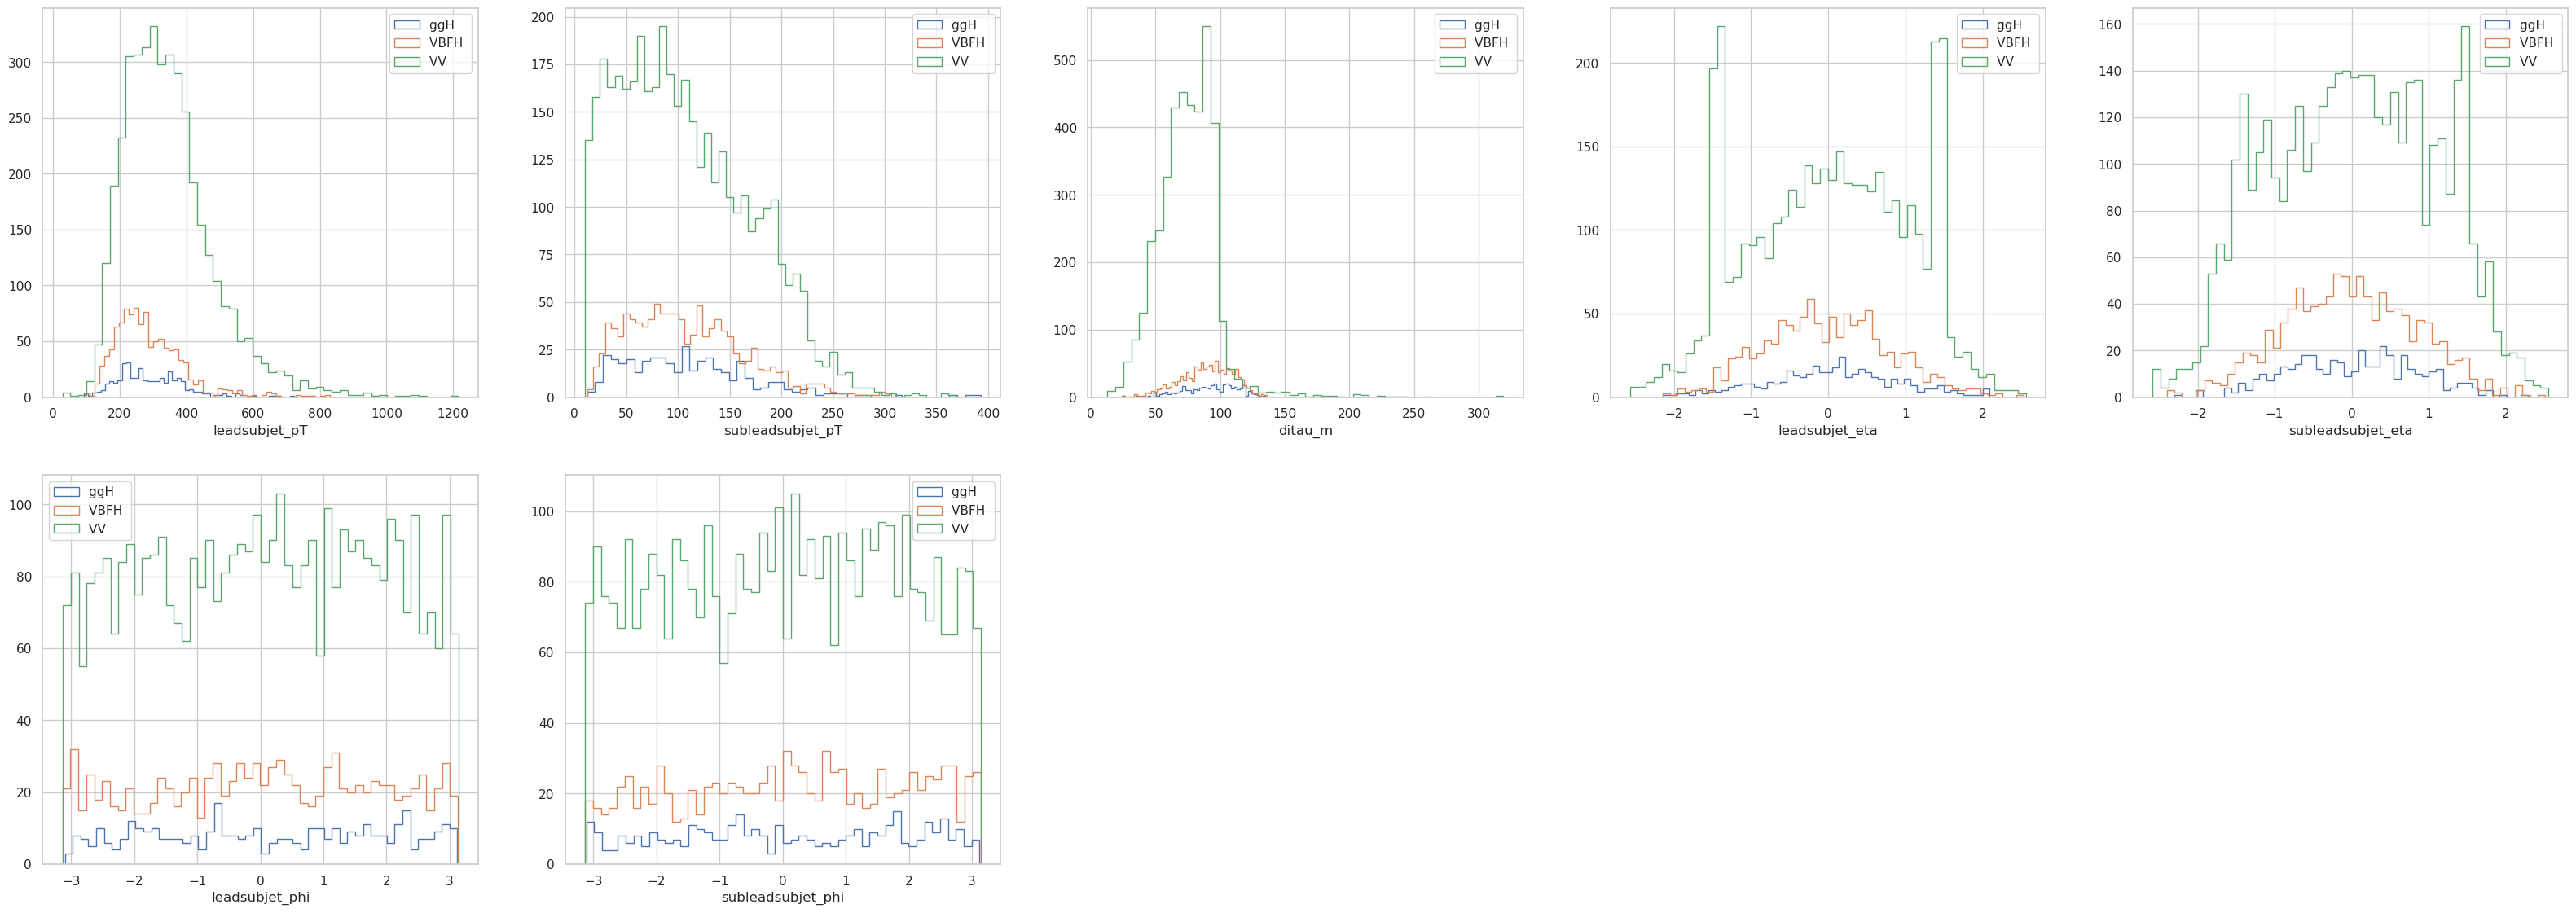

In [18]:
plot_var = [
    'leadsubjet_pT', 'subleadsubjet_pT',
    'ditau_m', 'leadsubjet_eta', 'subleadsubjet_eta',
    'leadsubjet_phi', 'subleadsubjet_phi'
]

plt.figure(figsize=(40, 36))
def hist(variable, plot_num):
    print("Start Plot:", variable)
    plt.subplot(5, 5, plot_num+1)
    bin = 50
    plt.hist(ggh_plot[i], bins=bin, histtype='step', linewidth=1, label=f'ggH ')
    plt.hist(vbfh_plot[i], bins=bin, histtype='step', linewidth=1, label=f'VBFH ')
    plt.hist(vv_plot[i], bins=bin, histtype='step', linewidth=1, label=f'VV ')
    # plt.hist(ztt_plot[i], bins=bin, histtype='step', linewidth=1, label=f'Ztt ', weights=np.ones_like(ztt_plot[i])/10)
    plt.xlabel(variable)
    #plt.ylabel("Number of Events (scaled)")
    #plt.title(xlabel)
#     plt.yscale('log')
    plt.legend()
    plt.grid(True)

for i, label in enumerate(plot_var, 0):
    hist(label, i)

Start Plot: leadsubjet_pT


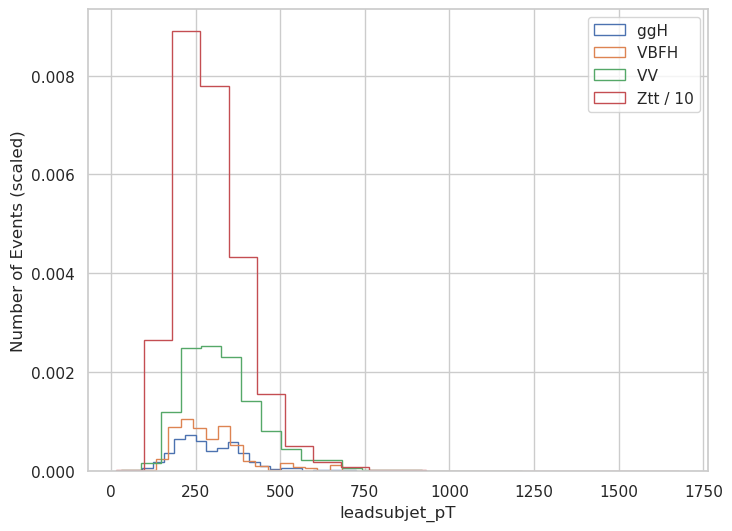

Start Plot: subleadsubjet_pT


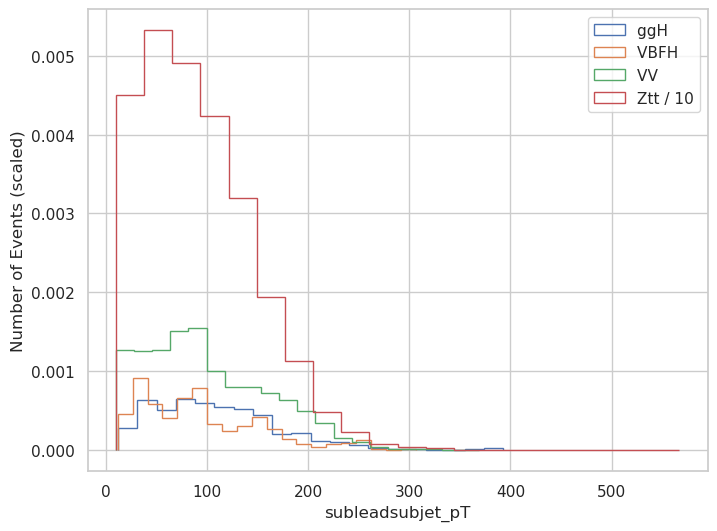

Start Plot: ditau_m


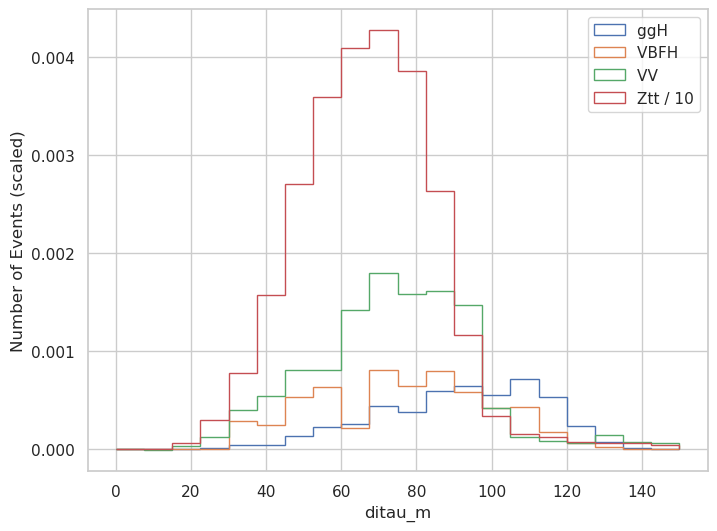

Start Plot: leadsubjet_eta


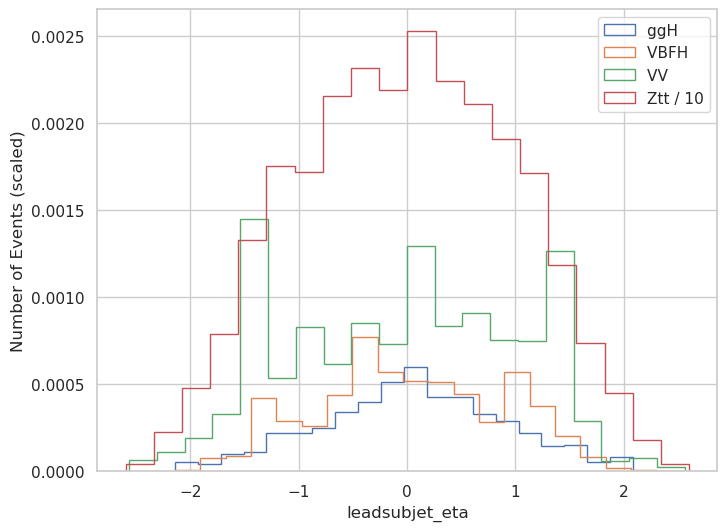

Start Plot: subleadsubjet_eta


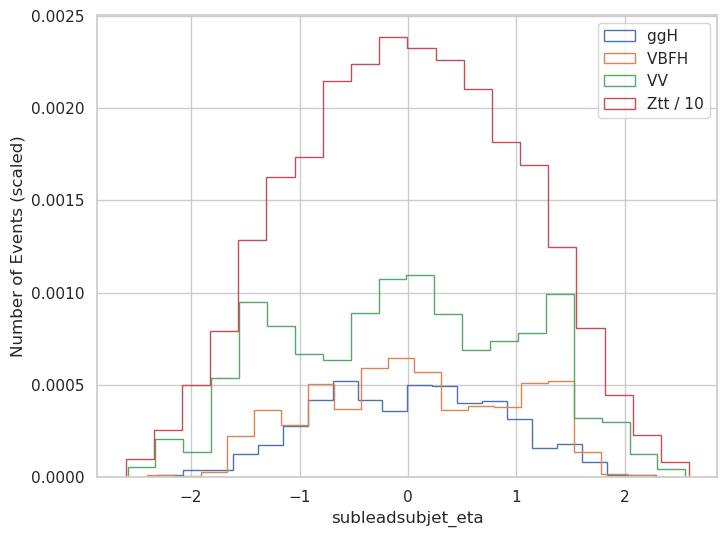

Start Plot: leadsubjet_phi


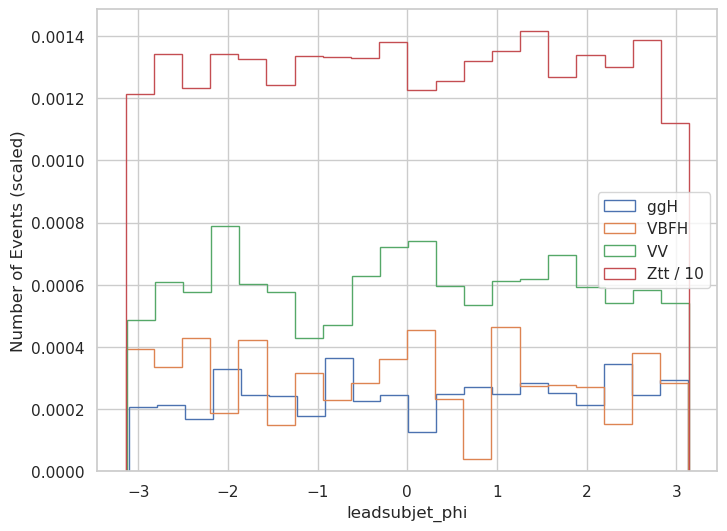

Start Plot: subleadsubjet_phi


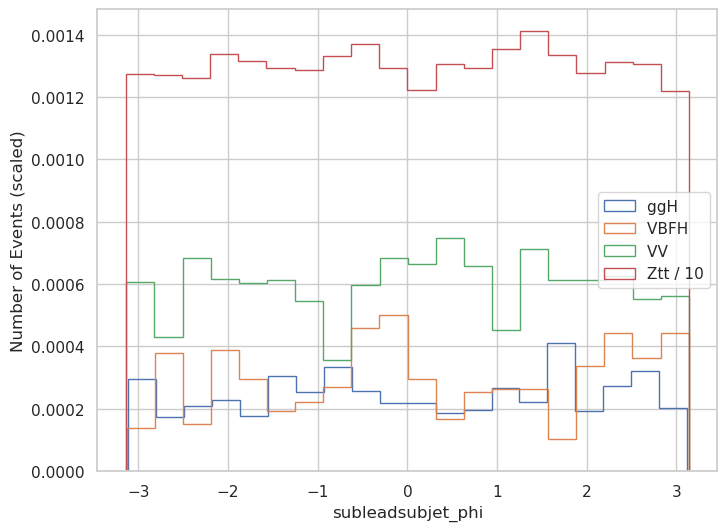

In [130]:

def hist(variable):
    print("Start Plot:", variable)
    bin = 20
    plt.figure(figsize=(8, 6))  # Adjust the figsize as per your preference
    if variable == 'ditau_m':
        plt.hist(ggh_plot[i], bins=bin, range=(0, 150), histtype='step', linewidth=1, label=f'ggH ', weights=ggh_plot[7]*lumi_scale_factor)
        plt.hist(vbfh_plot[i], bins=bin, range=(0, 150), histtype='step', linewidth=1, label=f'VBFH ',  weights=vbfh_plot[7]*lumi_scale_factor)
        plt.hist(vv_plot[i], bins=bin, range=(0, 150), histtype='step', linewidth=1, label=f'VV ', weights=vv_plot[7]*lumi_scale_factor)
        plt.hist(ztt_plot[i], bins=bin, range=(0, 150), histtype='step', linewidth=1, label=f'Ztt / 10', weights=ztt_plot[7]*lumi_scale_factor/10)
    elif variable == 'collinear_mass':
        plt.hist(ggh_plot[i], bins=bin, range=(0, 550), histtype='step', linewidth=1, label=f'ggH ', weights=ggh_plot[7]*lumi_scale_factor)
        plt.hist(vbfh_plot[i], bins=bin, range=(0, 550), histtype='step', linewidth=1, label=f'VBFH ',  weights=vbfh_plot[7]*lumi_scale_factor)
        plt.hist(vv_plot[i], bins=bin, range=(0, 550), histtype='step', linewidth=1, label=f'VV ', weights=vv_plot[7]*lumi_scale_factor)
        plt.hist(ztt_plot[i], bins=bin, range=(0, 550), histtype='step', linewidth=1, label=f'Ztt / 10', weights=ztt_plot[7]*lumi_scale_factor/10)
    else:
        plt.hist(ggh_plot[i], bins=bin, histtype='step', linewidth=1, label=f'ggH ', weights=ggh_plot[7]*lumi_scale_factor)
        plt.hist(vbfh_plot[i], bins=bin, histtype='step', linewidth=1, label=f'VBFH ',  weights=vbfh_plot[7]*lumi_scale_factor)
        plt.hist(vv_plot[i], bins=bin, histtype='step', linewidth=1, label=f'VV ', weights=vv_plot[7]*lumi_scale_factor)
        plt.hist(ztt_plot[i], bins=bin, histtype='step', linewidth=1, label=f'Ztt / 10', weights=ztt_plot[7]*lumi_scale_factor/10)
        
    plt.xlabel(variable)
    plt.ylabel("Number of Events (scaled)")
#     plt.yscale('log')
    plt.legend()
    plt.grid(True)
    plt.show()

for i, label in enumerate(plot_var):
    hist(label)

Warning in <TROOT::Append>: Replacing existing TH1: root_hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: root_hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: root_hist (Potential memory leak).


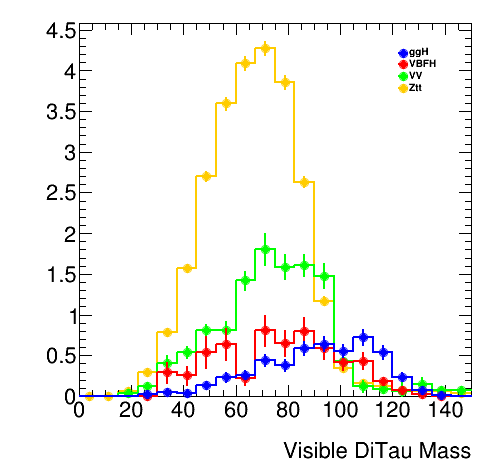

In [19]:
ROOT.gROOT.SetStyle("ATLAS")
canvas = ROOT.TCanvas("canvas", "eff_plots", 500, 500)
canvas.Clear()
canvas.cd()

# ggh_plt = plt_to_root_hist_w(ggh_plot[2], 10, 0, 150, None, False)
# ggh_plt.SetLineColor(ROOT.kRed)
# ggh_plt.SetMarkerColor(ROOT.kRed)
# vbfh_plt = plt_to_root_hist_w(vbfh_plot[2], 10, 0, 150, None, False)
# vbfh_plt.SetLineColor(ROOT.kBlue)
# vbfh_plt.SetMarkerColor(ROOT.kBlue)
# vv_plt = plt_to_root_hist_w(vv_plot[2], 10, 0, 150, None, False)
# vv_plt.SetLineColor(ROOT.kGreen)
# vv_plt.SetMarkerColor(ROOT.kGreen)
# ztt_plt = plt_to_root_hist_w(ztt_plot[2], 10, 0, 150, None, False)
# ztt_plt.SetLineColor(ROOT.kOrange)
# ztt_plt.SetMarkerColor(ROOT.kOrange)

lumi_scale_factor = 58450.1 #for mc20e

ggh_plt = plt_to_root_hist_w(ggh_plot[2], 20, 0, 150, ggh_plot[7]*lumi_scale_factor, False)
ggh_plt.SetLineColor(ROOT.kBlue)
ggh_plt.SetMarkerColor(ROOT.kBlue)
vbfh_plt = plt_to_root_hist_w(vbfh_plot[2], 20, 0, 150, vbfh_plot[7]*lumi_scale_factor, False)
vbfh_plt.SetLineColor(ROOT.kRed)
vbfh_plt.SetMarkerColor(ROOT.kRed)
vv_plt = plt_to_root_hist_w(vv_plot[2], 20, 0, 150, vv_plot[7]*lumi_scale_factor, False)
vv_plt.SetLineColor(ROOT.kGreen)
vv_plt.SetMarkerColor(ROOT.kGreen)
ztt_plt = plt_to_root_hist_w(ztt_plot[2], 20, 0, 150, ztt_plot[7]*lumi_scale_factor/10, False)
ztt_plt.SetLineColor(ROOT.kOrange)
ztt_plt.SetMarkerColor(ROOT.kOrange)

# ggh_plt.Scale(1. / ggh_plt.Integral())
# vbfh_plt.Scale(1. / vbfh_plt.Integral())
# vv_plt.Scale(1. / vv_plt.Integral())
# ztt_plt.Scale(1. / ztt_plt.Integral())
# ggh_plt.Scale(1000.)
# vbfh_plt.Scale(1000.)
# vv_plt.Scale(1000.)
# ztt_plt.Scale(1000.)

ztt_plt.Draw("hist e ")
vv_plt.Draw("hist e same")
vbfh_plt.Draw("hist e same")
ggh_plt.Draw("hist e same")

ztt_plt.GetXaxis().SetTitle('Visible DiTau Mass')

legend = ROOT.TLegend(0.8, 0.8, 0.9, 0.9)
legend.SetBorderSize(0)
legend.SetFillColor(0)
legend.AddEntry(ggh_plt, "ggH")
legend.AddEntry(vbfh_plt, "VBFH")
legend.AddEntry(vv_plt, "VV")
legend.AddEntry(ztt_plt, "Ztt")
legend.Draw()

canvas.Draw()


In [20]:
import logging

def bin_significance_counting(signal, bkg, s_much_less_than_b=True):
    """
    Helper function to compute significance in a given bin
    Given by the following formula:

    Z = sqrt(2 * ((s + b) * log(1 + s / b) - s))
    """
    if s_much_less_than_b:
        return signal / np.sqrt(bkg)
    else:
        sig = (signal + bkg) * np.log(1 + signal / bkg) - signal
        sig = np.sqrt(2 * sig)
        return sig

def significance_bin_by_bin(signal, bkg, s_much_less_than_b=True):
    """
    Calculate total significance using bin-by-bin significance
    via a simple sum in quadrature of each bin significance
    """

    tot_signifiance = 0
    for iBin, (s, b) in enumerate(zip(signal, bkg)):
        if b <= 0:
            continue
        _sig = bin_significance_counting(s, b, s_much_less_than_b=s_much_less_than_b)
        logging.debug(
            'bin {}, signal = {}, background = {}, significance = {}'.format(
            iBin, s, b, _sig))
        tot_signifiance += _sig * _sig

    return np.sqrt(tot_signifiance)

In [22]:
sig_list = np.concatenate([np.array(ggh_plot[2]), np.array(vbfh_plot[2])])
sig_w_list = np.concatenate([np.array(ggh_plot[7])*lumi_scale_factor, np.array(vbfh_plot[7])*lumi_scale_factor])

bkg_list = np.concatenate([np.array(vv_plot[2]), np.array(ztt_plot[2])])
bkg_w_list = np.concatenate([np.array(vv_plot[7])*lumi_scale_factor, np.array(ztt_plot[7])*lumi_scale_factor])

sig_hist = plt_to_root_hist_w(sig_list, 20, 0, 150, sig_w_list, False)
bkg_hist = plt_to_root_hist_w(bkg_list, 20, 0, 150, bkg_w_list, False)
# sig_hist.Scale(1000.)
# bkg_hist.Scale(1000.)

significance_bin_by_bin(sig_hist, bkg_hist, s_much_less_than_b=False)

1.2866498460303954

Warning in <TROOT::Append>: Replacing existing TH1: root_hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: root_hist (Potential memory leak).


In [45]:
np.array(vbfh_plot[2]).shape

(1074,)

Start Scatter Plot: leadsubjet_eta vs leadsubjet_phi


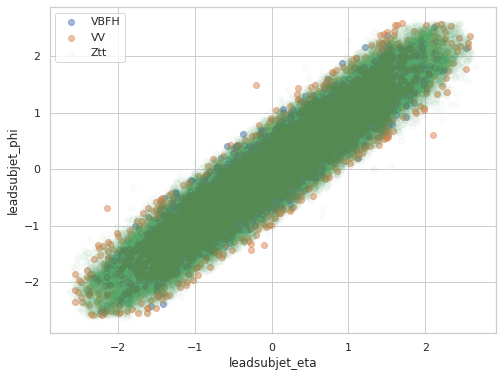

In [25]:

def scatter(variable_x, variable_y):
    print("Start Scatter Plot:", variable_x, "vs", variable_y)
    plt.figure(figsize=(8, 6))  # Adjust the figsize as per your preference
#     plt.scatter(ggh_plot[i], ggh_plot[j], label='ggH', alpha=0.5, )
    plt.scatter(vbfh_plot[4], vbfh_plot[5], label='VBFH', alpha=0.5)
    plt.scatter(vv_plot[4], vv_plot[5], label='VV', alpha=0.5)
    plt.scatter(ztt_plot[4], ztt_plot[5], label='Ztt', alpha=0.03)
    plt.xlabel(variable_x)
    plt.ylabel(variable_y)
    plt.legend()
    plt.grid(True)
    plt.show()


scatter("leadsubjet_eta", 'leadsubjet_phi')

In [135]:
training_var = [
    'leadsubjet_pT', 'subleadsubjet_pT',
    'ditau_m', 'leadsubjet_eta', 'subleadsubjet_eta',
    'leadsubjet_phi', 'subleadsubjet_phi', 'weight'
]
ggh_df = pd.DataFrame(np.array(ggh_plot).T, columns=training_var)
vbfh_df = pd.DataFrame(np.array(vbfh_plot).T, columns=training_var)
vv_df = pd.DataFrame(np.array(vv_plot).T, columns=training_var)
ztt_df = pd.DataFrame(np.array(ztt_plot).T, columns=training_var)
#combine ggh_df, vbfh_df into one df and add label column with values 1
ggh_df['label'] = 1
vbfh_df['label'] = 1
vv_df['label'] = 0
ztt_df['label'] = 0
df = pd.concat([ggh_df, vbfh_df, vv_df, ztt_df])
df

,leadsubjet_pT,subleadsubjet_pT,ditau_m,leadsubjet_eta,subleadsubjet_eta,leadsubjet_phi,subleadsubjet_phi,weight,label
0,211.761250,63.461070,66.615230,0.180724,0.739123,1.739694,1.793372,2.195137e-07,1
1,237.898859,105.042719,102.228745,-1.208190,-1.000373,-1.700233,-1.082282,2.166406e-07,1
2,227.077750,107.879742,74.630597,0.188478,0.383733,2.596596,3.028004,2.137185e-07,1
3,207.387125,164.134766,87.593940,1.086295,0.857181,-2.497494,-2.085287,2.199292e-07,1
4,173.858094,119.113367,75.850367,0.489969,-0.000705,-1.095264,-0.934093,2.180653e-07,1
...,...,...,...,...,...,...,...,...,...
97418,251.876313,61.484258,52.325163,1.010463,0.877266,0.786221,0.395744,5.079712e-08,0
97419,309.336187,167.611453,75.482638,1.007525,0.706143,-0.164997,-0.040912,4.272516e-08,0
97420,304.656688,15.696003,43.193646,-1.043484,-0.525061,-1.897901,-1.577498,5.623201e-08,0
97421,270.774906,266.905406,55.816916,0.480762,0.350480,0.779854,0.938804,3.698343e-08,0


In [136]:
#split the data into training and testing
X = df[training_var]
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#save weights in a separate variable
weights_train = np.abs(X_train['weight']*lumi_scale_factor)
weights_test = np.abs(X_test['weight']*lumi_scale_factor)

# weights should not be included in the training data
X_train.drop(columns='weight', inplace=True)
X_test.drop(columns='weight', inplace=True)

#Change column names to integers if needed (for ML models that expect numerical feature names)
feature_mapping = {feature: i for i, feature in enumerate(X_train.columns)}
X_train.rename(columns=feature_mapping, inplace=True)
X_test.rename(columns=feature_mapping, inplace=True)

#print size of training and testing data
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, weights_train.shape, weights_test.shape)


(77216, 7) (25739, 7) (77216,) (25739,) (77216,) (25739,)


In [137]:
weights_train

77028    0.005887
18875    0.008651
93166    0.004190
21160    0.000898
83335    0.007492
           ...   
733      0.001234
49354    0.003530
71288    0.003754
463      0.002011
10263    0.002941
Name: weight, Length: 77216, dtype: float64

In [153]:
# create the BDT
params = {
'learning_rate': 0.06, 'max_depth': 3, 'n_estimators': 100,
'eval_metric': 'logloss',
'random_state': 0,
'gamma': 0.001,
'verbosity': 2
}
bdt = XGBClassifier(**params)

# Train the classifier
bdt.fit(X_train, y_train, eval_set=[(X_test, y_test)], sample_weight=weights_train)

[0]	validation_0-logloss:0.16067
[1]	validation_0-logloss:0.15462
[2]	validation_0-logloss:0.14897
[3]	validation_0-logloss:0.14371
[4]	validation_0-logloss:0.13881
[5]	validation_0-logloss:0.13424
[6]	validation_0-logloss:0.12997
[7]	validation_0-logloss:0.12599
[8]	validation_0-logloss:0.12228
[9]	validation_0-logloss:0.11881
[10]	validation_0-logloss:0.11558
[11]	validation_0-logloss:0.11256
[12]	validation_0-logloss:0.10974
[13]	validation_0-logloss:0.10711
[14]	validation_0-logloss:0.10466
[15]	validation_0-logloss:0.10237
[16]	validation_0-logloss:0.10023
[17]	validation_0-logloss:0.09824
[18]	validation_0-logloss:0.09637
[19]	validation_0-logloss:0.09463
[20]	validation_0-logloss:0.09300
[21]	validation_0-logloss:0.09149
[22]	validation_0-logloss:0.09006
[23]	validation_0-logloss:0.08873
[24]	validation_0-logloss:0.08749
[25]	validation_0-logloss:0.08633
[26]	validation_0-logloss:0.08525
[27]	validation_0-logloss:0.08424
[28]	validation_0-logloss:0.08329
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.001, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.06, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=0, ...)

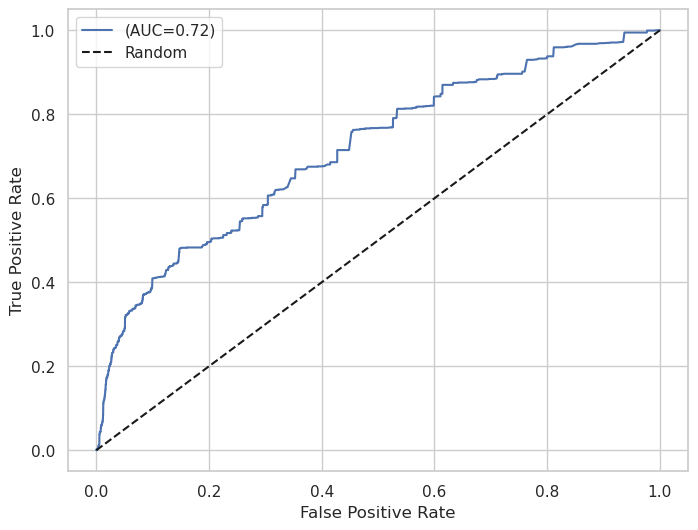

/tmp/ipykernel_859518/4097516489.py:19: RuntimeWarning: divide by zero encountered in divide
  plt.plot(tpr, 1/fpr, lw=1)


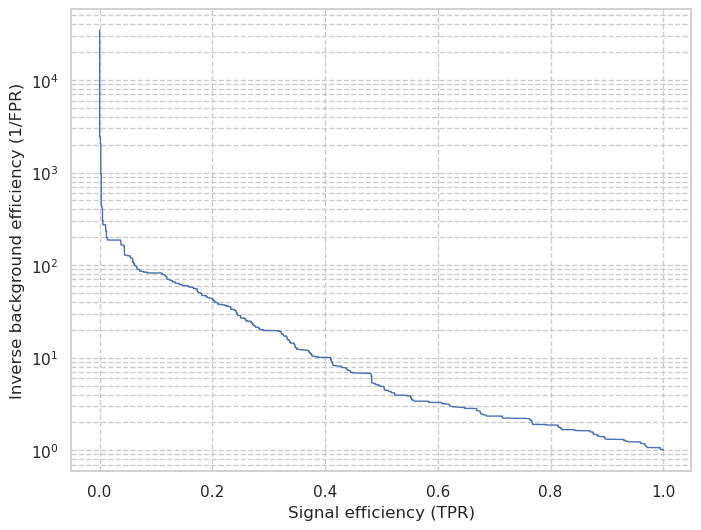

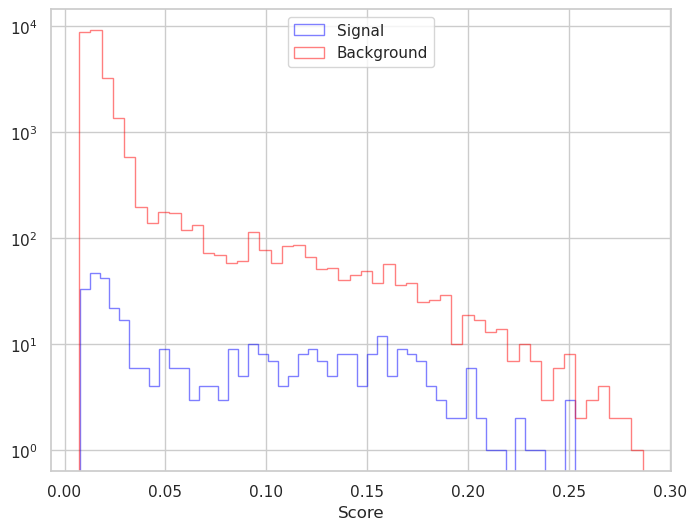

In [154]:
# plot the ROC curve
y_pred = bdt.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred, sample_weight=weights_test)
roc_auc = roc_auc_score(y_test, y_pred, sample_weight=weights_test)
# fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'(AUC={roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='k', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(tpr, 1/fpr, lw=1)
plt.xlabel('Signal efficiency (TPR)')
plt.ylabel('Inverse background efficiency (1/FPR)')
plt.yscale('log')
plt.grid(True, which="both", ls="--")
plt.show()



signal_scores = y_pred[y_test == 1]
background_scores = y_pred[y_test == 0]
plt.figure(figsize=(8, 6))
plt.hist(signal_scores, bins=50, alpha=0.5, color='blue', label='Signal', histtype='step')
plt.hist(background_scores, bins=50, alpha=0.5, color='red', label='Background', histtype='step')
plt.xlabel('Score')
plt.yscale('log')
plt.legend(loc='upper center')
plt.grid(True)
plt.show()


Epoch 1/60, Training Loss: 8.2114e-02, Validation Loss: 8.8489e-02, Training Accuracy: 9.8456e-01, Validation Accuracy: 9.8339e-01
Epoch 2/60, Training Loss: 7.7049e-02, Validation Loss: 8.7074e-02, Training Accuracy: 9.8605e-01, Validation Accuracy: 9.8339e-01
Epoch 3/60, Training Loss: 7.6257e-02, Validation Loss: 8.7502e-02, Training Accuracy: 9.8605e-01, Validation Accuracy: 9.8339e-01
Epoch 4/60, Training Loss: 7.5811e-02, Validation Loss: 8.9287e-02, Training Accuracy: 9.8605e-01, Validation Accuracy: 9.8339e-01
Epoch 5/60, Training Loss: 7.4915e-02, Validation Loss: 9.1926e-02, Training Accuracy: 9.8605e-01, Validation Accuracy: 9.8339e-01
Epoch 6/60, Training Loss: 7.5196e-02, Validation Loss: 8.5216e-02, Training Accuracy: 9.8605e-01, Validation Accuracy: 9.8339e-01
Epoch 7/60, Training Loss: 7.4188e-02, Validation Loss: 9.1780e-02, Training Accuracy: 9.8605e-01, Validation Accuracy: 9.8339e-01
Epoch 8/60, Training Loss: 7.3595e-02, Validation Loss: 8.4100e-02, Training Accura

/tmp/ipykernel_494722/3460810616.py:184: RuntimeWarning: divide by zero encountered in divide
  plt.plot(tpr_mlp, 1/fpr_mlp, color='black', lw=1)


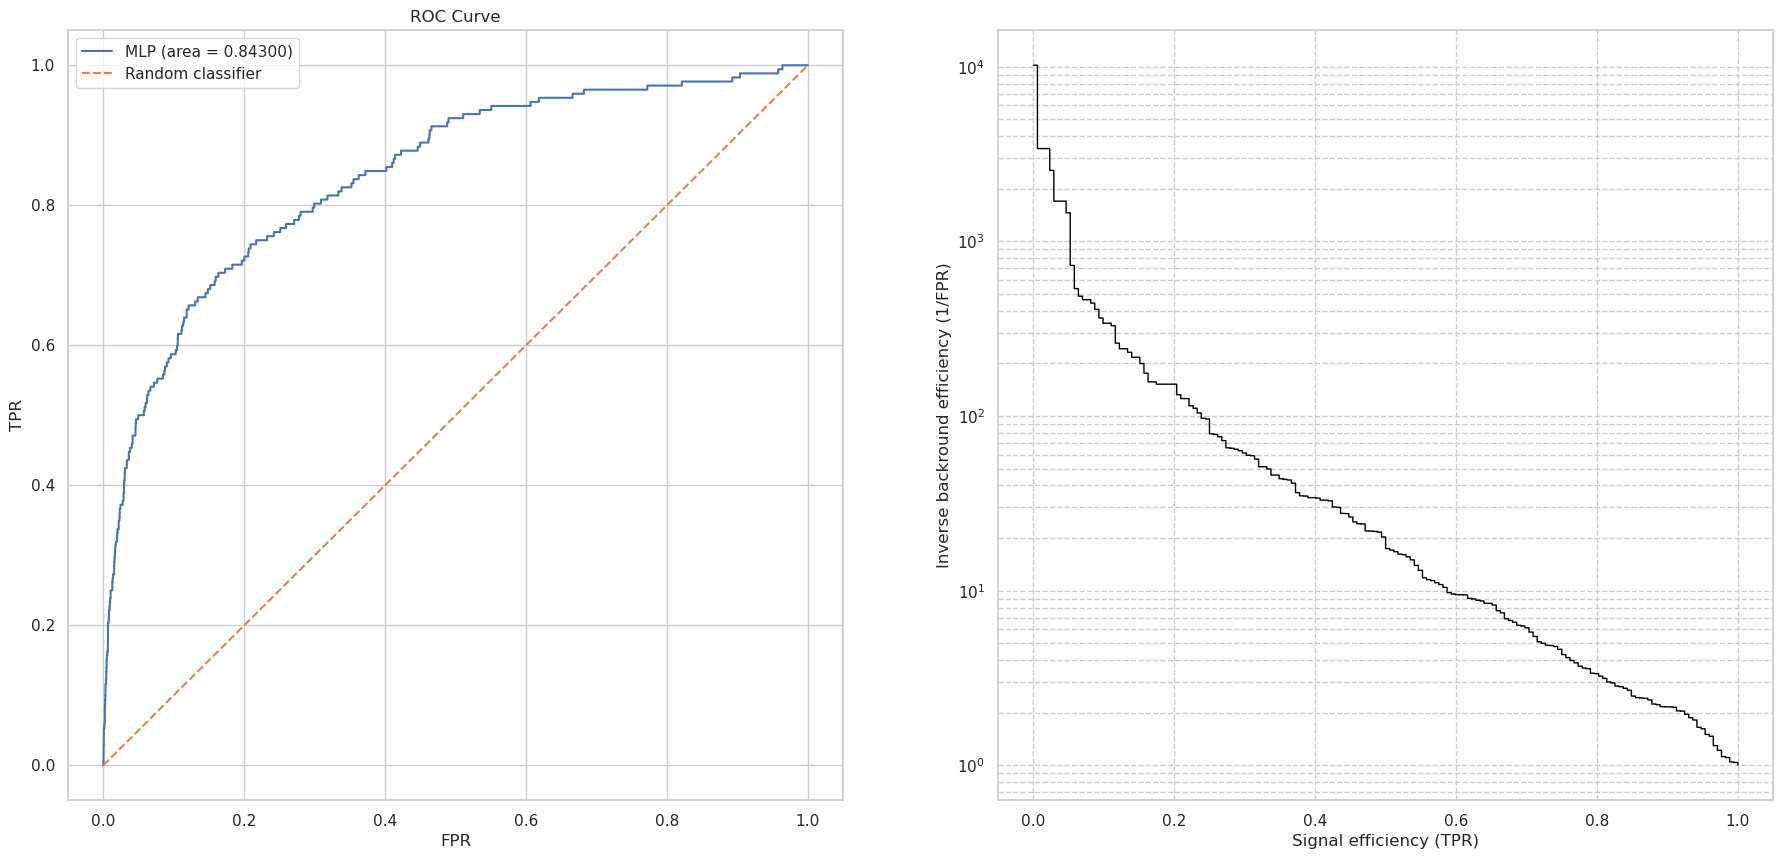

Pytorch Time: 1.5788460453351338 min


In [81]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

start = time.time()

learning_rate = 0.0001
batch_size = 128
dropout = 0
neuron1 = 64
neuron2 = 256
# neuron3 = 512
neuron4 = 256
neuron5 = 64


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Convert to PyTorch tensors and move to device
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).to(device)
# weights_train_tensor = torch.tensor(weights_train.values, dtype=torch.float32).to(device)

X_val_tensor = torch.tensor(X_test.values, dtype=torch.float32).to(device)
y_val_tensor = torch.tensor(y_test.values, dtype=torch.float32).to(device)

# Define the Dataset
class SignalBackgroundDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels
        # self.weights = weights

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

# Define the DNN model with dropout
class DNN(nn.Module):
    def __init__(self, input_size):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(input_size, neuron1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=dropout)
        self.fc2 = nn.Linear(neuron1, neuron2)
        self.fc3 = nn.Linear(neuron2, neuron4)
        # self.fc4 = nn.Linear(neuron3, neuron4)
        self.fc5 = nn.Linear(neuron4, neuron5)
        self.fc6 = nn.Linear(neuron5, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.relu(self.fc3(x))
        x = self.dropout(x)
        # x = self.relu(self.fc4(x))
        # x = self.dropout(x)
        x = self.relu(self.fc5(x))
        x = self.dropout(x)
        x = self.sigmoid(self.fc6(x))
        return x

model = DNN(X_train_tensor.shape[1]).to(device)
criterion = nn.BCELoss(reduction='none')
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Create DataLoader for training data
train_dataset = SignalBackgroundDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = SignalBackgroundDataset(X_val_tensor, y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

num_epochs = 60
patience = 6  # How many epochs to wait after last time validation loss improved.
best_val_loss = np.inf  # Initialize best validation loss to infinity
epochs_no_improve = 0  # Counter for epochs with no improvement

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_predictions, total_predictions = 0, 0

    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), targets)
        # loss = (loss * batch_weights).mean()
        loss = loss.mean()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # binary classification for accuracy calculation
        preds = outputs.squeeze().round()
        correct_predictions += (preds == targets).sum().item()
        total_predictions += targets.size(0)

    train_accuracy = correct_predictions / total_predictions
    avg_training_loss = running_loss / len(train_loader)

    # Validation phase
    model.eval()
    val_running_loss = 0.0
    correct_predictions, total_predictions = 0, 0

    with torch.no_grad():
        for inputs, targets in val_loader:
            inputs, targets = inputs.to(device), targets.to(device)

            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), targets)
            # loss = (loss * batch_weights).mean()
            loss = loss.mean()

            val_running_loss += loss.item()

            preds = outputs.squeeze().round()
            correct_predictions += (preds == targets).sum().item()
            total_predictions += targets.size(0)

    val_accuracy = correct_predictions / total_predictions
    avg_val_loss = val_running_loss / len(val_loader)

#     # Log metrics to W&B
#     wandb.log({
#         'epoch': epoch,
#         'training_loss': avg_training_loss,
#         'validation_loss': avg_val_loss,
#         'training_accuracy': train_accuracy,
#         'validation_accuracy': val_accuracy
#     })

    print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {avg_training_loss:.4e}, Validation Loss: {avg_val_loss:.4e}, Training Accuracy: {train_accuracy:.4e}, Validation Accuracy: {val_accuracy:.4e}")

    # Check if the validation loss improved
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        epochs_no_improve = 0
        # Save the model
        # torch.save(model.state_dict(), 'best_model.pth')
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print(f'Early stopping triggered after {epoch + 1} epochs.')
            break  # Early stopping


# Evaluate on the validation set
model.eval()
val_predictions = []
with torch.no_grad():
    for inputs, targets in DataLoader(SignalBackgroundDataset(X_val_tensor, y_val_tensor), batch_size=batch_size, shuffle=False):
        inputs = inputs.to(device)
        outputs = model(inputs).squeeze()
        val_predictions.extend(outputs.cpu().numpy())
val_predictions = np.array(val_predictions)

# Compute ROC curve and ROC area
fpr_mlp, tpr_mlp, _ = roc_curve(y_test.values, val_predictions)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

plt.figure(figsize=(22, 10))
plt.subplot(121)
plt.plot(fpr_mlp, tpr_mlp, label='MLP (area = {:.5f})'.format(roc_auc_mlp))
plt.plot([0, 1], [0, 1], linestyle='--', label='Random classifier')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)

plt.subplot(122)
plt.plot(tpr_mlp, 1/fpr_mlp, color='black', lw=1)
plt.xlabel('Signal efficiency (TPR)')
plt.ylabel('Inverse backround efficiency (1/FPR)')
plt.yscale('log')
plt.grid(True, which="both", ls="--")
plt.show()

print(f'Pytorch Time: {(time.time() - start)/60} min')